


**NAME=ANKITA**   
**PROJECT NAME= CUSTOMER CHURN PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle


df=pd.read_csv("/content/Indian_Customers (1)(2).csv")

In [ ]:
df.shape

(150, 10)

In [ ]:
df.head()

,Name,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_Date,Location,Company,Churn
0,Mannat Ghosh,55,255359.80,Neysa Raja,10.4,3,2020-02-01,Haldia,Grover Inc,No
1,Manikya Tara,42,210804.82,Lakshay Sane,18.8,1,2023-02-24,Thoothukudi,Chaudhuri Group,No
2,Romil Gala,28,281928.92,Kavya Mani,8.3,9,2020-03-26,Amroha,"Dada, Sankaran and Sarna",No
3,Madhup Kumar,26,292319.90,Manikya Sood,9.8,7,2015-02-11,Meerut,Bhakta-Sankaran,Yes
4,Raghav Kaul,54,405819.88,Eshani Dash,4.8,10,2020-04-22,Rajpur Sonarpur,Banik LLC,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             150 non-null    object 
 1   Age              150 non-null    int64  
 2   Total_Purchase   150 non-null    float64
 3   Account_Manager  150 non-null    object 
 4   Years            150 non-null    float64
 5   Num_Sites        150 non-null    int64  
 6   Onboard_Date     150 non-null    object 
 7   Location         150 non-null    object 
 8   Company          150 non-null    object 
 9   Churn            150 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 11.8+ KB


In [ ]:
df=df.drop(columns=["Num_Sites"])

In [ ]:
df.head(2)

,Name,Age,Total_Purchase,Account_Manager,Years,Onboard_Date,Location,Company,Churn
0,Mannat Ghosh,55,255359.80,Neysa Raja,10.4,2020-02-01,Haldia,Grover Inc,No
1,Manikya Tara,42,210804.82,Lakshay Sane,18.8,2023-02-24,Thoothukudi,Chaudhuri Group,No


In [ ]:
df.columns

Index(['Name', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Onboard_Date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

Name               0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Onboard_Date       0
Location           0
Company            0
Churn              0
dtype: int64


In [ ]:
print(df["Churn"].value_counts())

Churn
No     79
Yes    71
Name: count, dtype: int64


In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
df.columns

Index(['Name', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Onboard_Date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [ ]:
df.head(2)

,Name,Age,Total_Purchase,Account_Manager,Years,Onboard_Date,Location,Company,Churn
0,Mannat Ghosh,55,255359.80,Neysa Raja,10.4,2020-02-01,Haldia,Grover Inc,No
1,Manikya Tara,42,210804.82,Lakshay Sane,18.8,2023-02-24,Thoothukudi,Chaudhuri Group,No


In [ ]:
df.describe()

,Age,Total_Purchase,Years
count,150.000000,150.000000,150.000000
mean,42.200000,248771.772067,11.007333
std,14.171055,140887.633614,5.649115
min,18.000000,6322.000000,1.200000
25%,29.250000,134417.132500,5.750000
50%,42.000000,233674.660000,11.250000
75%,55.000000,384705.597500,16.075000
max,65.000000,498625.220000,19.700000


In [ ]:
def plot_histogram(df,column):
  plt.figure(figsize=(10,6))
  sns.histplot(data=df,x=column,kde=True,color="k")
  plt.title(f"Distribution of {column}")
  col_mean=df[column].mean()
  col_median=df[column].median()
  plt.axvline(col_mean,color="red",linestyle="dashed",linewidth=2,label="Mean")
  plt.axvline(col_median,color="green",linestyle="dashed",linewidth=2,label="Median")
  plt.legend()
  plt.show()

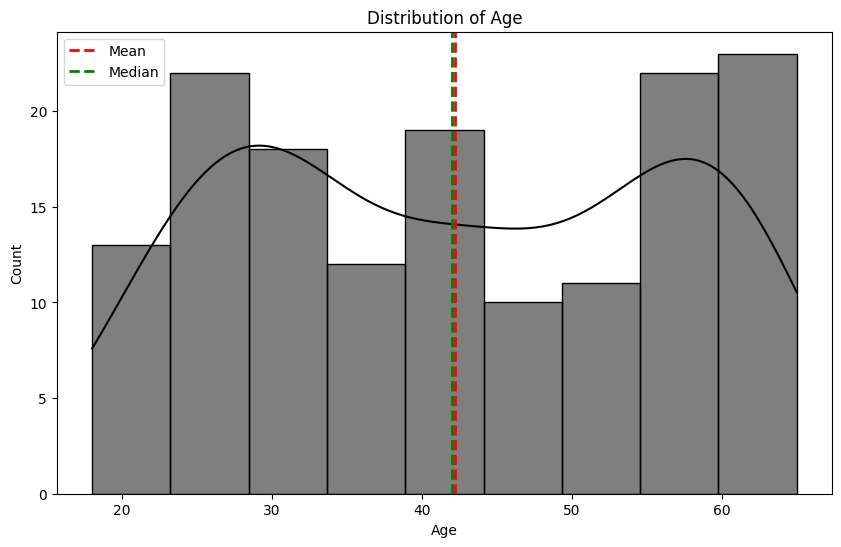

In [ ]:
ef plot_histogram(df,column):
  plt.figure(figsize=(10,6))
  sns.histplot(data=df,x=column,kde=True,color="k")
  plt.title(f"Distribution of {column}")
  col_mean=df[column].mean()
  col_median=df[column].median()
  plt.axvline(col_mean,color="red",linestyle="dashed",linewidth=2,label="Mean")
  plt.axvline(col_median,color="green",linestyle="dashed",linewidth=2,label="Median")
  plt.legend()
  plt.show()

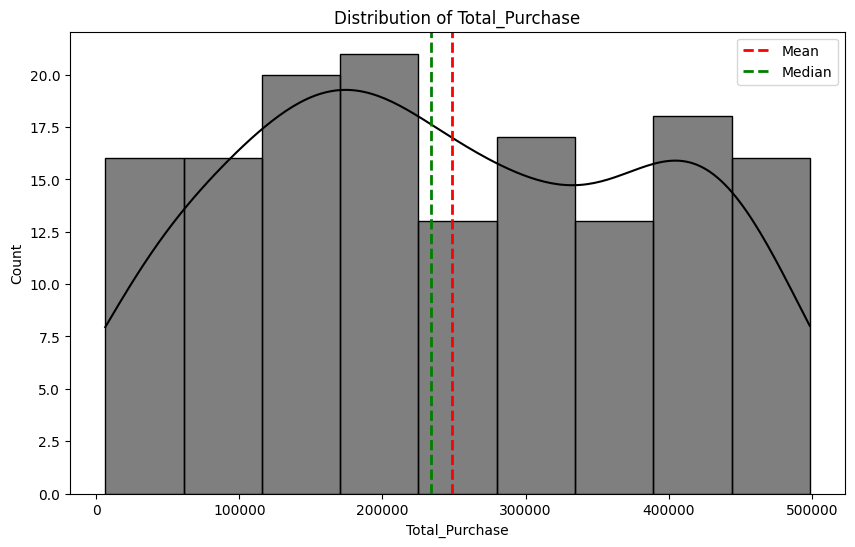

In [ ]:
plot_histogram(df,"Total_Purchase")

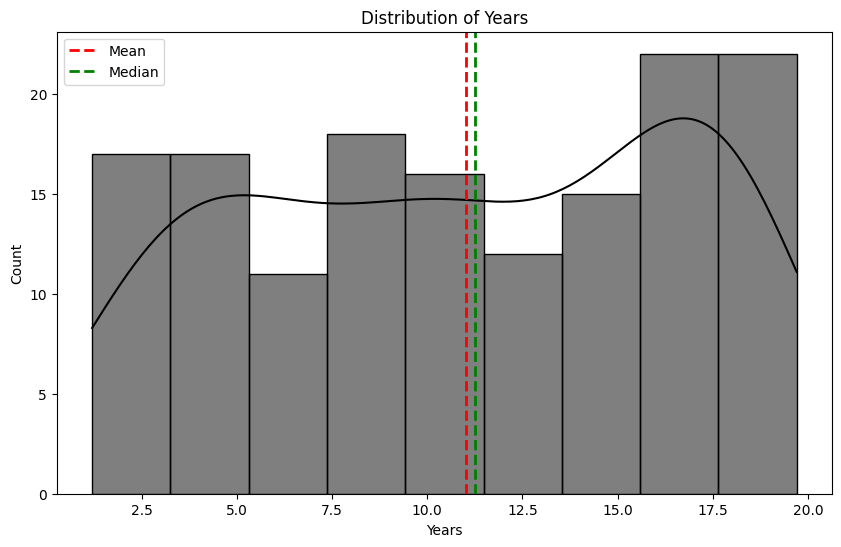

In [ ]:
plot_histogram(df,"Years")

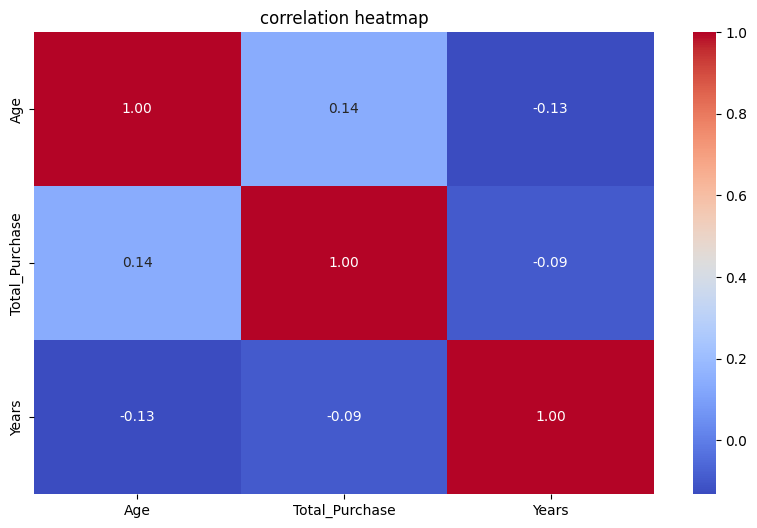

In [ ]:
df.columns

Index(['Name', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Onboard_Date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             150 non-null    object 
 1   Age              150 non-null    int64  
 2   Total_Purchase   150 non-null    float64
 3   Account_Manager  150 non-null    object 
 4   Years            150 non-null    float64
 5   Onboard_Date     150 non-null    object 
 6   Location         150 non-null    object 
 7   Company          150 non-null    object 
 8   Churn            150 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 10.7+ KB


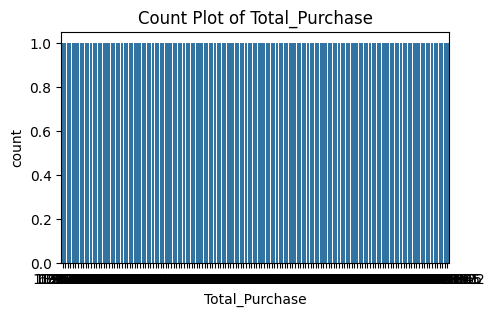

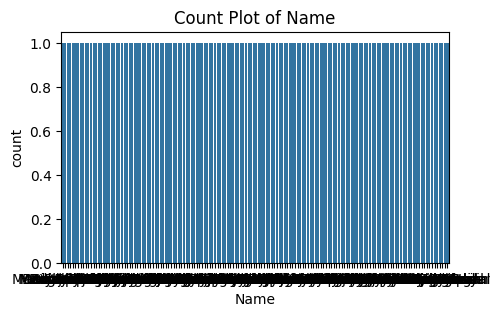

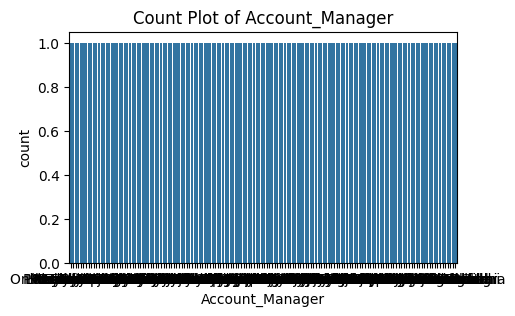

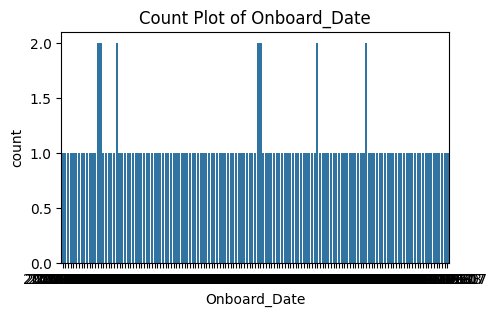

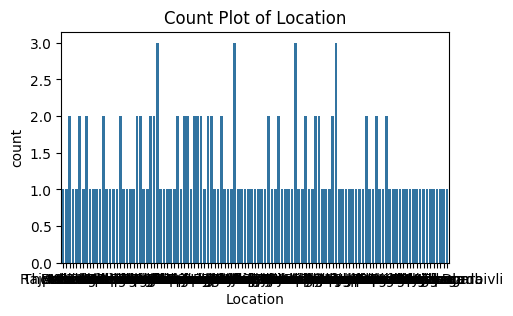

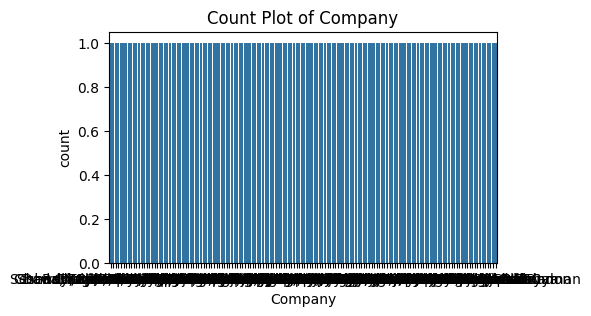

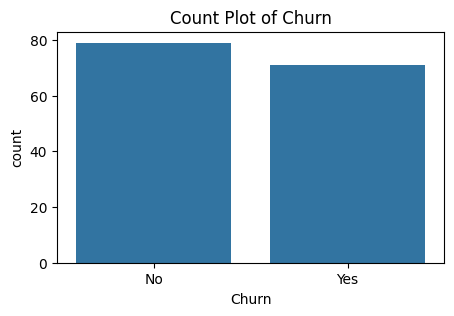

In [ ]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["Total_Purchase"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

In [ ]:
df.head(2)

,Name,Age,Total_Purchase,Account_Manager,Years,Onboard_Date,Location,Company,Churn
0,Mannat Ghosh,55,255359.80,Neysa Raja,10.4,2020-02-01,Haldia,Grover Inc,No
1,Manikya Tara,42,210804.82,Lakshay Sane,18.8,2023-02-24,Thoothukudi,Chaudhuri Group,No


In [ ]:
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

<ipython-input-23-566ef3b8e999>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})


In [ ]:
df.head(2)

,Name,Age,Total_Purchase,Account_Manager,Years,Onboard_Date,Location,Company,Churn
0,Mannat Ghosh,55,255359.80,Neysa Raja,10.4,2020-02-01,Haldia,Grover Inc,0
1,Manikya Tara,42,210804.82,Lakshay Sane,18.8,2023-02-24,Thoothukudi,Chaudhuri Group,0


In [ ]:
print(df["Churn"].value_counts())

Churn
0    79
1    71
Name: count, dtype: int64


In [ ]:
object_columns = df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

Index(['Name', 'Account_Manager', 'Onboard_Date', 'Location', 'Company'], dtype='object')


In [ ]:
encoders={}

In [ ]:
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

{'Name': LabelEncoder(),
 'Account_Manager': LabelEncoder(),
 'Onboard_Date': LabelEncoder(),
 'Location': LabelEncoder(),
 'Company': LabelEncoder()}

In [ ]:
df.head(2)

,Name,Age,Total_Purchase,Account_Manager,Years,Onboard_Date,Location,Company,Churn
0,73,55,255359.80,92,10.4,70,35,58,0
1,70,42,210804.82,75,18.8,113,106,24,0


In [ ]:

X = df.drop(columns=["Churn"])
y = df["Churn"]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=79)

In [ ]:
print(y_train.shape)

(135,)


In [ ]:
print(y_train.value_counts())

Churn
0    71
1    64
Name: count, dtype: int64


In [ ]:
smote=SMOTE(random_state=79)

In [ ]:
x_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [ ]:
print(y_train_smote.shape)

(142,)


In [ ]:
print(y_train_smote.value_counts())

Churn
0    71
1    71
Name: count, dtype: int64


In [ ]:

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=79),
    "Random Forest": RandomForestClassifier(random_state=79),
    "XGBoost": XGBClassifier(random_state=79)
}

In [ ]:
cv_scores={}

In [ ]:
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.53
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.53
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.53
----------------------------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.37931034, 0.55172414, 0.57142857, 0.64285714, 0.5       ]),
 'Random Forest': array([0.37931034, 0.55172414, 0.57142857, 0.64285714, 0.5       ]),
 'XGBoost': array([0.37931034, 0.55172414, 0.57142857, 0.64285714, 0.5       ])}

In [ ]:
rfc=RandomForestClassifier(random_state=79)

In [ ]:
rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=79)

In [ ]:
print(y_test.value_counts())

Churn
0    8
1    7
Name: count, dtype: int64


In [ ]:
y_test_pred=rfc.predict(X_test)
print("Accuracy score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification report:\n",classification_report(y_test,y_test_pred))


Accuracy score:
 0.4666666666666667
Confusion matrix:
 [[4 4]
 [4 3]]
Classification report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.43      0.43      0.43         7

    accuracy                           0.47        15
   macro avg       0.46      0.46      0.46        15
weighted avg       0.47      0.47      0.47        15



In [ ]:
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [ ]:
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [ ]:
print(loaded_model)

RandomForestClassifier(random_state=79)


In [ ]:
print(feature_names)

['Name', 'Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Onboard_Date', 'Location', 'Company']


In [ ]:
input_data={
    'Name':"Ira Ratti",
    'Age':34,
    'Total_Purchase' :62468.98,
    'Account_Manager' :'Tara Sura',
    'Years' :14,
    'Onboard_Date':'2023-02-24',
    'Location':"Ranchi",
    'Company': "Grover Inc"
}

In [ ]:
input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)



for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])


prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)


print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[1]
Prediction: Churn
Prediciton Probability: [[0.48 0.52]]
